In [1]:
import random
import numpy as np
from skimage.draw import disk, rectangle
from typing import List, Tuple
import matplotlib.pyplot as plt

In [75]:
def random_figure_generator(image_size = (224, 224)):
  #генерируем фон рандомного цвета
  im = np.ones((image_size[0],image_size[1], 3))
  im[:,:,0], im[:,:,1], im[:,:,2] = np.random.rand(3)

  # определяем тип фигуры, позицию, цвет
  figure_type = random.choice(['disk', 'rectangle'])
  figure_position = random.choice([0, 1]), random.choice([0, 1])
  coords_centr = [random.uniform(0, 0.49) * image_size[0] if position == 0 
            else random.uniform(0.51, 1) * image_size[0] 
            for position in figure_position]

  if figure_type == 'disk':
    radius = random.uniform(0.05, 0.10) * min(image_size)
    rr, cc = disk((coords_centr[0], coords_centr[1]), radius, shape=image_size)

  if figure_type == 'rectangle':
    rectangle_size = [random.uniform(0.05, 0.20) * image_size[0], random.uniform(0.05, 0.20) * image_size[1]]
    coords_start = [round(coords_centr[0] - (rectangle_size[0] / 2)), round(coords_centr[1] - rectangle_size[1] / 2)]
    extent = (round(rectangle_size[0]) , round(rectangle_size[1]))
    rr, cc = rectangle(coords_start, extent=extent, shape=image_size)
  im[rr,cc,0], im[rr,cc,1], im[rr,cc,2] = np.random.rand(3)
  return im

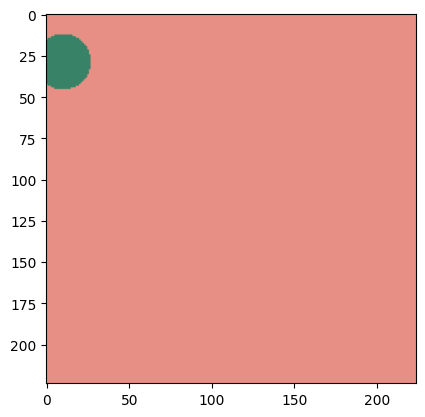

In [117]:
im = random_figure_generator()
plt.imshow(im)